In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
path="/lustre/ytzheng/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' + Casename + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + Casename1 + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [4]:
nt = f['time'].size
t_hours = np.arange(nt)

myfontsize = 12

In [5]:
def plt1D(ax, x, y, y1, ytitle, smooth=0):
    if smooth == 0:
        ax.plot(x, y, linewidth=2, label = 'CADV', color = 'dodgerblue')
        ax.plot(x, y1, linewidth=2, label = 'WADV', linestyle = '-',color = 'crimson')
    else:
        ax.plot(x, y, linewidth=2, label = 'CADV', color = 'dodgerblue', alpha=0.2)
        ax.plot(x, y1, linewidth=2, label = 'WADV', linestyle = '-',color = 'crimson', alpha=0.2)
        
        yhat = savgol_filter(y, 21, 3)
        yhat1 = savgol_filter(y1, 21, 3)

        ax.plot(x, yhat, linewidth=2, label = 'CADV', color = 'dodgerblue')
        ax.plot(x, yhat1, linewidth=2, label = 'WADV', linestyle = '-',color = 'crimson')
        
    ax.grid(True)
    ax.set_xlim([0., nt])
    ax.set_ylabel(ytitle, fontsize=myfontsize)  # Add a y-label to the axes.
    ax.set_xlabel('Time (hours)', fontsize=myfontsize)  # Add a y-label to the axes.

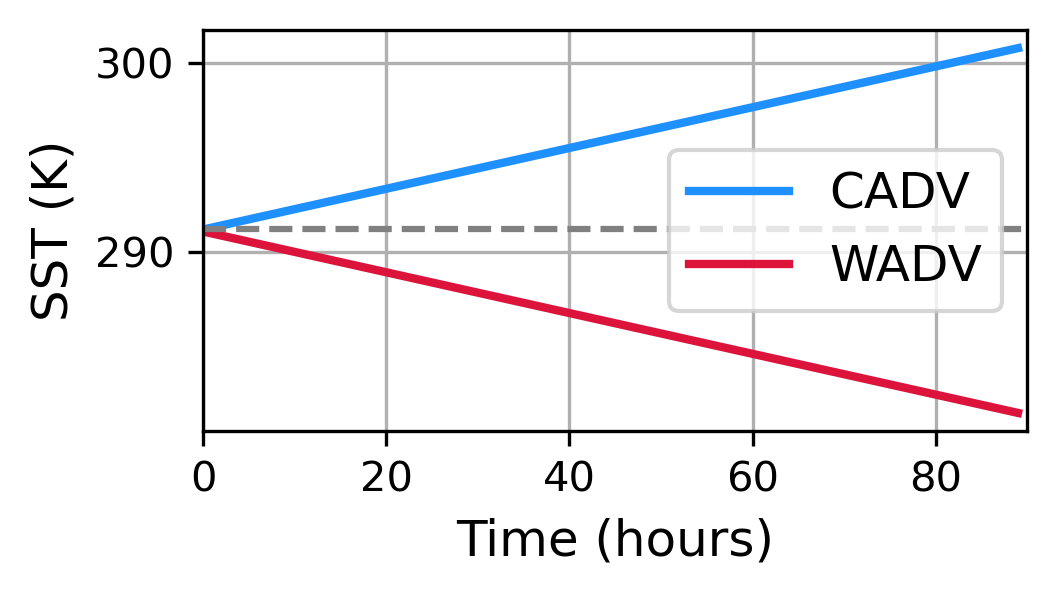

In [6]:
fig, axs = plt.subplots(1,1,figsize=(9/2.54, (9./2)/2.54), dpi = 300)

plt1D(axs, t_hours, f['SST'].values[0:nt], f1['SST'].values[0:nt], r"SST (K)")
axs.legend(loc="best", fontsize=myfontsize)
axs.axhline(y=f['SST'].values[0],linestyle='--',color = 'grey')

fig.savefig('plot_method_SST_versus_time.png', dpi=fig.dpi, bbox_inches='tight')